**A transaction symbolizes a unit of work performed within a database management system against a database, and is treated in a coherent and reliable way, independent of other transactions.**

In simpler terms, think about taking a two-legged flight from Mumbai to New York. 
* The first airline takes you from Mumbai to Dubai, and the second takes you from Dubai to New York.
* The two flight legs represent portions of a transaction.
* You must travel both legs to reach your destination, but if immigration forbids you from taking the second leg of the flight, you’d want to return back to Mumbai and not remain stranded at Dubai.

A database transaction is similar. 
* You either want all the actions within the transaction to complete or none at all.
* You don’t want a transaction to complete halfway through and then abort.

# Need for Transactions

One may wonder why we need transactions. Well, whenever multiple users are interacting with a database, it is possible for the actions of one user to interfere with another user and bring the data into an inconsistent state. 

The classic example is transferring funds from one bank account to another. 
* Say the bank application wants to add **100** dollars to your bank account with a balance of **500** dollars.
* The application reads your balance, adds **100** dollars to it, and then updates the new amount of 600 dollars in the database against your username.
* It could happen that between the time the application reads and updates the new amount, you make an ATM withdrawal of **200** dollars.
* The application has already read your balance and doesn’t know that **200** dollars has been withdrawn, and mistakenly writes your balance as **600** dollars to the database.

The application layer could avoid this mistake if it performed the two tasks of reading and then updating your balance atomically, or in other words, as a transaction. 

**Transactions allow you to batch together SQL statements as an indivisible set that either succeeds or has no effect on the database.**

**Syntax to Start & Commit a Transaction**:

```mysql
START TRANSACTION;

** – SQL statements

COMMIT;
```

**Syntax to Start & Rollback a Transaction**

```mysql
START TRANSACTION;

** – SQL statements

ROLLBACK;
```

**EXAMPLE**:

* MySQL operates in **AUTOCOMMIT** mode, so whatever commands we issue at the MySQL prompt are committed and treated as a transaction. 
* However, we can explicitly start a transaction and then either proceed to commit it or roll it back. 

Consider the following sequence of commands:

```mysql
START TRANSACTION;

UPDATE Actors 
SET Id = 100 
WHERE FirstName = "Brad";

COMMIT;
```

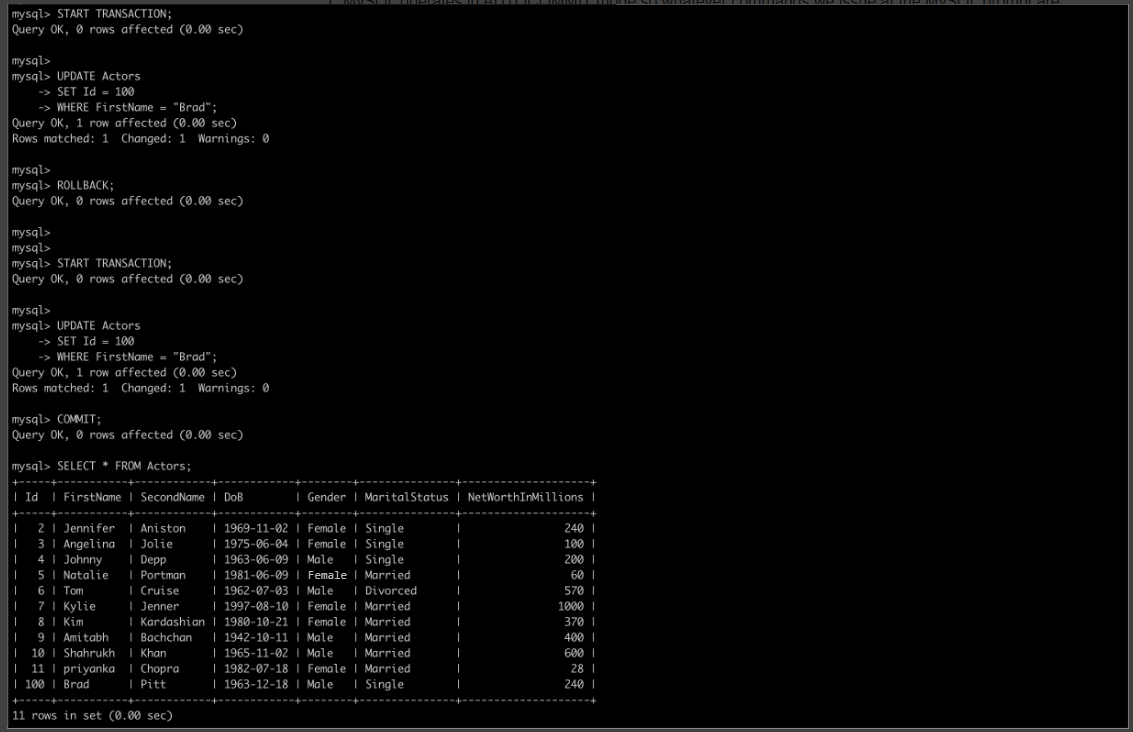

Now we’ll start a transaction but roll it back midway and observe the changes that don’t take place.

```mysql
START TRANSACTION;

UPDATE Actors 
SET Id = 200 
WHERE FirstName = "Tom";

ROLLBACK;
```

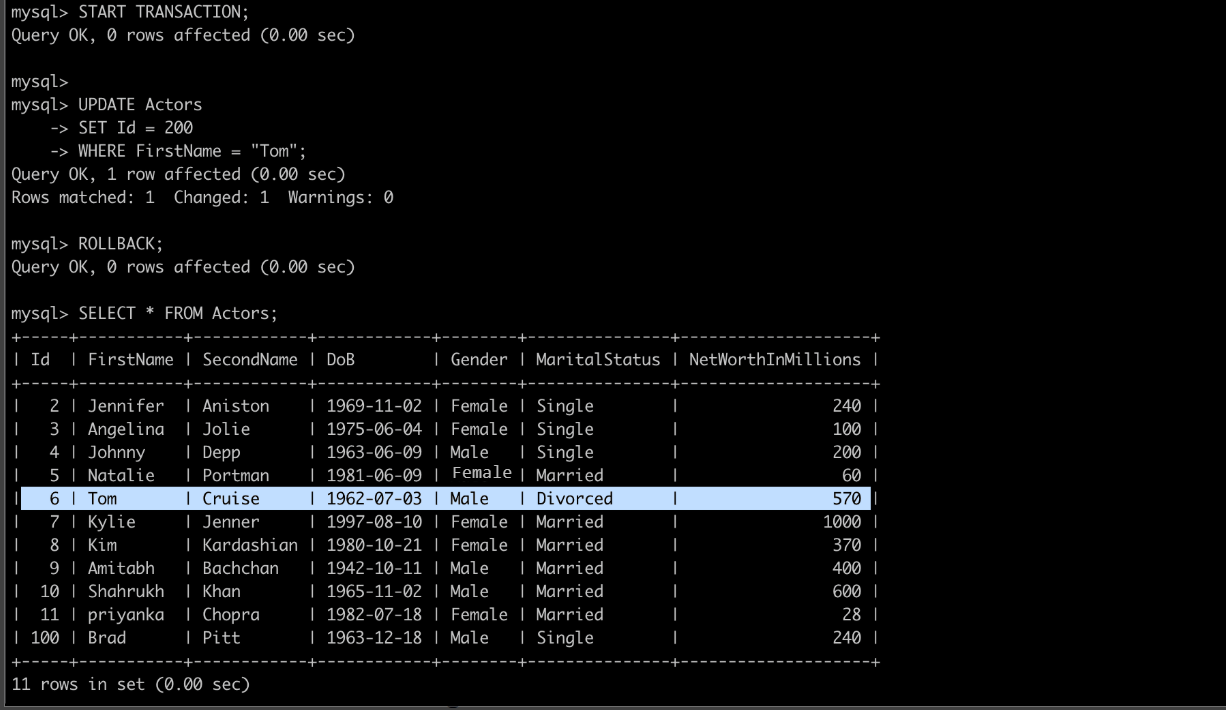

You can observe from the screenshot that once we roll back the transaction, the changes we intended don’t take place.

# Locking

* Transactions are important so that users don’t step on each other’s feet when interacting with the database. 
* The database system has to block other transactions from executing while another is in progress and targets the same tables.
* Also, there are some storage engines that don’t support transactions.
* Irrespective of whether transactions are supported or not, the database system has to implement some sort of locking mechanism to protect tables from being modified by multiple users at the same time.
There are various levels of sophistication built into database engines on how to handle concurrent users. For instance, in the case of **MyISAM**, the entire table gets locked, while **InnoDB** provides granular locking at the row level.

You can view all the available types of storage engines on your version of MySQL as follows:

```msql
SHOW ENGINES;
```

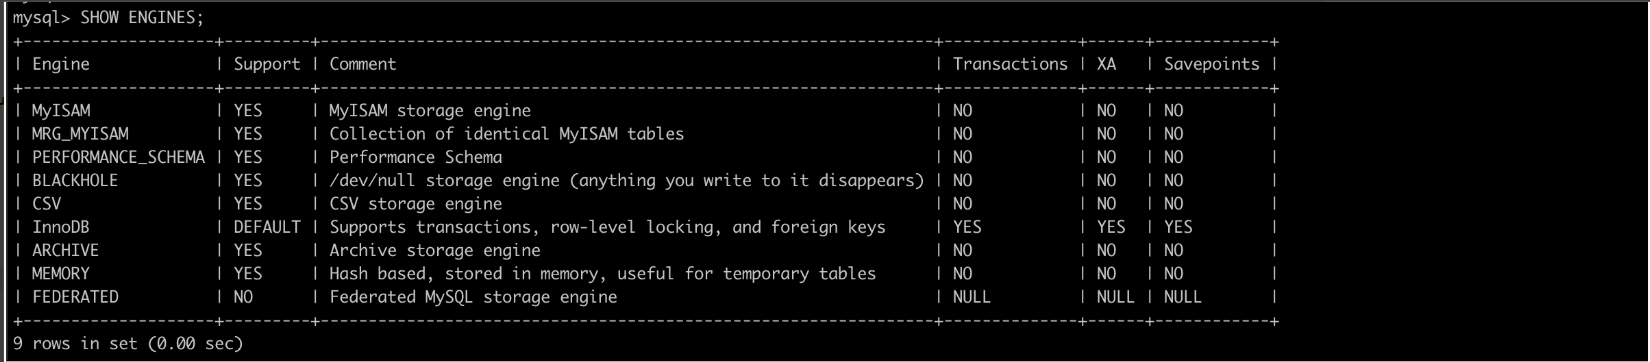

As you can observe from the output, there are nine types of database engines available, and by default, tables get created as the **InnoDB** type. 
* You can also see from the output which engines support transactions and which don’t.
* MyISAM doesn’t support transactions that InnoDB does.

There are pros and cons to using each type. 
* **InnoDB** supports fine-grained locking at the cost of slower performance, but allows multiple users to make modifications to a table at the same time.
* On the other hand, **MyISAM** places whole-table locks to handle multiple users, which is simpler and faster but reduces concurrency.

We’ll end our general discussion on transactions and locking here, but there are many other nuances to this topic that are out of scope for an introductory course on MySQL. 
* The takeaway is to be cognizant that the type of storage engine you choose for your tables has consequences on the performance of your overall application.
* As the number of users of your application increases, you’ll need to use more sophisticated storage engines that are used to handle the high concurrent load.